# Studying the Titanic

#### Field: Descriptions
    survival: Survival(0 = No, 1 = Yes)
    pclass: Passenger class(1 = 1st, 2 = 2nd, 3 = 3rd)
    name: Name of the passenger
    sex: Gender of the passenger
    age: Age of the passenger
    sibsp: Number of siblings/spouses aboard
    parch: Number of parents/children aboard
    ticket: Ticket number
    fare: Passenger fare
    cabin: Cabin
    embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [1]:
import pandas as pd
import pylab as plt
import numpy as np

In [2]:
df = pd.read_csv('data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

#### Q1) Which passenger class has the maximum number of survivors?

In [4]:
# my answer
df[df['Survived'] == 1].groupby('Pclass').size()

Pclass
1    136
2     87
3    119
dtype: int64

In [5]:
df['Pclass'].isnull().value_counts()

False    891
Name: Pclass, dtype: int64

In [6]:
df['Survived'].isnull().value_counts()

False    891
Name: Survived, dtype: int64

In [7]:
# Passengers survived in each class
survivors = df.groupby('Pclass')['Survived'].agg(sum)
survivors

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [8]:
# Total passengers in each class : my answer
total_passengers = df.groupby('Pclass').size()
total_passengers

Pclass
1    216
2    184
3    491
dtype: int64

In [9]:
total_passengers = df.groupby('Pclass')['PassengerId'].count()
total_passengers

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [10]:
survivor_percentage = survivors / total_passengers
survivor_percentage

Pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64

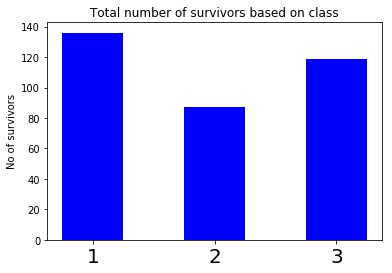

In [11]:
# Plotting the total number of survivors
fig = plt.figure()
ax  = fig.add_subplot(111)
rect = ax.bar(survivors.index.values.tolist(), survivors, color='blue', width=0.5)
ax.set_ylabel('No of survivors')
ax.set_title('Total number of survivors based on class')
xTickMarks = survivors.index.values.tolist()
ax.set_xticks(xTickMarks)
xTickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xTickNames, fontsize=20)
plt.show()

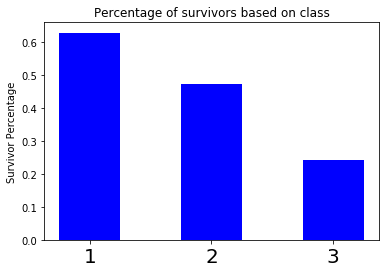

In [12]:
# Plotting the percentage of survivors in each class
fig = plt.figure()
ax  = fig.add_subplot(111)
rect = ax.bar(survivor_percentage.index.values.tolist(), survivor_percentage, color='blue', width=0.5)
ax.set_ylabel('Survivor Percentage')
ax.set_title('Percentage of survivors based on class')
xTickMarks = survivors.index.values.tolist()
ax.set_xticks(xTickMarks)
xTickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xTickNames, fontsize=20)
plt.show()

#### These are our observations:
    • The maximum number of survivors are in the first and third class, respectively
    • With respect to the total number of passengers in each class, first class has the maximum survivors at around 61%
    • With respect to the total number of passengers in each class, third class has the minimum number of survivors at around 25%

#### This is our key takeaway:
    • There was clearly a preference toward saving those from the first class as the ship was drowning. It also had the maximum percentage of survivors

### Q2) What is the distribution of survivors based on gender among the various classes?

In [13]:
# Check for any null values
df['Sex'].isnull().any()

False

In [14]:
# Male passengers survived in each class
male_survivors = df[df['Sex'] == 'male'].groupby('Pclass')['Survived'].agg(sum)
male_survivors.head()

Pclass
1    45
2    17
3    47
Name: Survived, dtype: int64

In [15]:
# Total male passengers in each class
male_total_passengers = df[df['Sex'] == 'male'].groupby('Pclass')['PassengerId'].count()
male_total_passengers

Pclass
1    122
2    108
3    347
Name: PassengerId, dtype: int64

In [16]:
male_survivor_percentage = male_survivors / male_total_passengers
male_survivor_percentage

Pclass
1    0.368852
2    0.157407
3    0.135447
dtype: float64

In [17]:
# Female passengers survived in each class
female_survivors = df[df['Sex']=='female'].groupby('Pclass')['Survived'].agg(sum)
female_survivors

Pclass
1    91
2    70
3    72
Name: Survived, dtype: int64

In [18]:
# Total female passengers in each class
female_total_passengers = df[df['Sex']=='female'].groupby('Pclass')['PassengerId'].count()
female_total_passengers

Pclass
1     94
2     76
3    144
Name: PassengerId, dtype: int64

In [19]:
female_survivor_percentage = female_survivors / female_total_passengers
female_survivor_percentage

Pclass
1    0.968085
2    0.921053
3    0.500000
dtype: float64

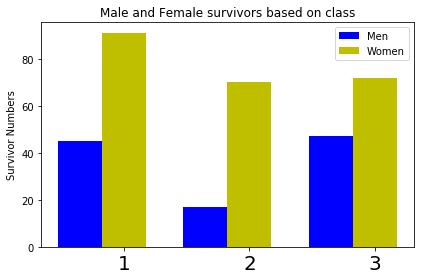

In [20]:
# Plotting the total passengers who survived based on Gender
fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survivors.count())
bar_width = 0.35
rect1 = ax.bar(index, male_survivors, bar_width, color='blue', label='Men')
rect2 = ax.bar(index + bar_width, female_survivors, bar_width, color='y', label='Women')
ax.set_ylabel('Survivor Numbers')
ax.set_title('Male and Female survivors based on class')
xTickMarks = male_survivors.index.values.tolist()
ax.set_xticks(index + bar_width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()

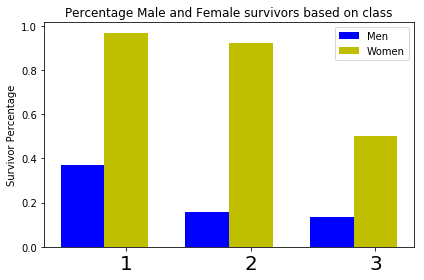

In [21]:
# Plotting the percentage of passengers who survived based on Gender
fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survivor_percentage.count())
bar_width = 0.35
rect1 = ax.bar(index, male_survivor_percentage, bar_width, color='blue', label='Men')
rect2 = ax.bar(index + bar_width, female_survivor_percentage, bar_width, color='y', label='Women')
ax.set_ylabel('Survivor Percentage')
ax.set_title('Percentage Male and Female survivors based on class')
xTickMarks = male_survivor_percentage.index.values.tolist()
ax.set_xticks(index + bar_width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()

#### These are our observations
    - The majority of survivors are females in all the classes
    - More than 90% of female passengers in first and second class survived
    - The percentage of male passengers who survived in first and third class, respectively, are comparable
#### This is our key takeaway:
    • Female passengers were given preference for lifeboats and the majority were saved.

### Q3) What is the distribution of nonsurvivors among the various classes who have family aboard the ship?

In [22]:
# check null values
df['SibSp'].isnull().any()

False

In [23]:
df['Parch'].isnull().any()

False

In [24]:
# Total number of non-survivors in each class who have family
non_survivors = df[(df['SibSp'] > 0) | (df['Parch'] > 0) & (df['Survived'] == 0)].groupby('Pclass')['Survived'].agg('count')
non_survivors

Pclass
1     88
2     66
3    153
Name: Survived, dtype: int64

In [25]:
# Total passengers in each class
total_passengers = df.groupby('Pclass')['PassengerId'].count()
total_passengers

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [26]:
non_survivor_percentage = non_survivors / total_passengers
non_survivor_percentage

Pclass
1    0.407407
2    0.358696
3    0.311609
dtype: float64

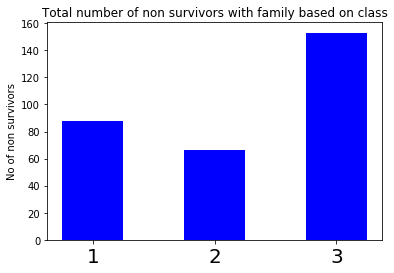

In [27]:
# Plotting number of non survivors with family based on class
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(non_survivors.index.values.tolist(), non_survivors, color='blue', width=0.5)
ax.set_ylabel('No of non survivors')
ax.set_title('Total number of non survivors with family based on class')
xTickMarks = non_survivors.index.values.tolist()
ax.set_xticks(xTickMarks)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

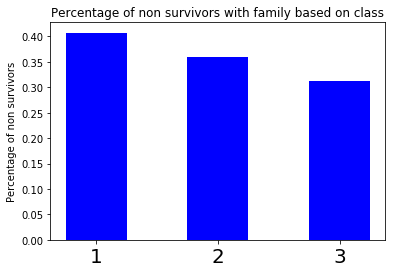

In [28]:
# Plotting percentage of non survivors with family based on class
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(non_survivor_percentage.index.values.tolist(), non_survivor_percentage, color='blue', width=0.5)
ax.set_ylabel('Percentage of non survivors')
ax.set_title('Percentage of non survivors with family based on class')
xTickMarks = non_survivor_percentage.index.values.tolist()
ax.set_xticks(xTickMarks)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

#### These are our observations:
    • There are lot of nonsurvivors in the third class
    • Second class has the least number of nonsurvivors with relatives
    • With respect to the total number of passengers, the first class, who had relatives aboard, has the maximum nonsurvivor percentage and the third class has the least
#### This is our key takeaway:
    • Even though third class has the highest number of nonsurvivors with relatives aboard, it primarily had passengers who did not have relatives on the ship, whereas in first class, most of the people had relatives aboard the ship

### Q4) What was the survival percentage among different age groups?

In [29]:
# check null values
df['Age'].isnull().any()

True

In [30]:
# Defining the age binning interval
age_bin = [0, 18, 25, 40, 60, 100]

In [37]:
# Creating bins
df['AgeBin'] = pd.cut(df.Age, bins=age_bin)
df['AgeBin'].sample(5)

493    (60, 100]
21      (25, 40]
10       (0, 18]
284          NaN
266      (0, 18]
Name: AgeBin, dtype: category
Categories (5, interval[int64]): [(0, 18] < (18, 25] < (25, 40] < (40, 60] < (60, 100]]

In [40]:
# Removing null rows
df_temp = df[np.isfinite(df['Age'])] # isfinite return true if value exist and false for no value

In [44]:
# Number of survivors based on age groups
survivors = df_temp.groupby('AgeBin')['Survived'].agg(sum)
survivors

AgeBin
(0, 18]       70
(18, 25]      54
(25, 40]     111
(40, 60]      50
(60, 100]      5
Name: Survived, dtype: int64

In [46]:
# Total passengers in each bin
total_passengers = df_temp.groupby('AgeBin')['PassengerId'].agg('count')
total_passengers

AgeBin
(0, 18]      139
(18, 25]     162
(25, 40]     263
(40, 60]     128
(60, 100]     22
Name: PassengerId, dtype: int64

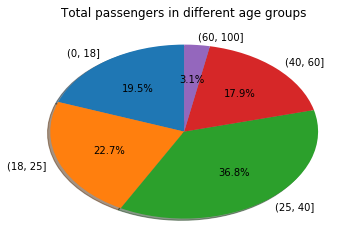

In [48]:
# Plotting pie chart of total passenger in each bin
plt.pie(total_passengers, labels=total_passengers.index.values.tolist(), autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Total passengers in different age groups')
plt.show()

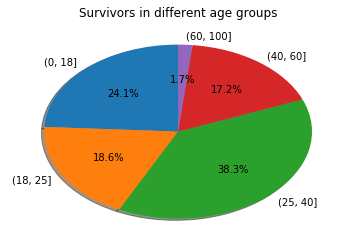

In [50]:
# Plotting pie chart of percentange passengers in each bin
plt.pie(survivors, labels=survivors.index.values.tolist(), autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Survivors in different age groups')
plt.show()

#### These are our observations:
    • The 25-40 age group has the maximum number of passengers, and 0-18 has the second highest number of passengers
    • Among the people who survived, the 18-25 age group has the second highest number of survivors
    • The 60-100 age group has a lower proportion among the survivors
#### This is our key takeaway:
    • The 25-40 age group had the maximum number of survivors compared to any other age group, and people who were old were either not lucky enough or made way for the younger people to the lifeboats.